In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymystem3 import Mystem
import xml.etree.ElementTree as etree

In [2]:
# морфологический анализатор
morph = Mystem()

In [3]:
# словарь словоформ OpenCorpora
file = etree.parse('dict.opcorpora.xml').getroot()

In [4]:
# список всех лемм, включая словоформы и их характеристики
lemmata = file[2]

# инициализация словаря лемм с частью речи без дополнительной информации
dictionary = set()

# извлечение лемм из словаря OpenCorpora во внутренний словарь
for lemma in lemmata:
    dictionary.add((lemma[0].attrib['t'], lemma[0][0].attrib['v']))

# конвертация множества в словарь
dictionary = dict(dictionary)

In [13]:
# считывание текстов
text1 = open('texts/prestuplenie-i-nakazanie.txt', 'r').read()
text2 = open('texts/anna-karenina.txt', 'r').read()
text3 = open('texts/mumu.txt', 'r').read()
text4 = open('texts/gore-ot-uma.txt', 'r').read()
text5 = open('texts/myortvye-dushi.txt', 'r').read()
text6 = open('texts/otcy-i-deti.txt', 'r').read()
text7 = open('texts/bratya-karamazovy.txt', 'r').read()
text8 = open('texts/vishnevyi-sad.txt', 'r').read()

# объединение текстов в одну коллекцию
text = ' '.join([text1, text2, text3, text4, text5, text6, text7, text8])

# извлечение лемм из коллекции
lemmas = morph.analyze(text)

# удаление из списка лемм "мусора", не имеющего характеристик:
# переносов строк, знаков препинания, иностранных слов и др.
lemmas = list(filter(lambda l: l.get('analysis') != None and len(l.get('analysis')) > 0, lemmas))

# оставить только лемму без дополнительных характеристик
lemmas = list(map(lambda l: l['analysis'][0]['lex'], lemmas))

In [25]:
# инициализация словаря лемм, которые встречаются в коллекции, с их частотами
freq_dict = dict(list(map(lambda x: (x[0], 0), dictionary.items())))

In [50]:
# вычисление частот лемм, которые встречаются в коллекции
for lemma in lemmas:
    if lemma in freq_dict.keys():
        freq_dict[lemma] += 1

print('Общее число лемм в коллекции текстов:', len(lemmas))
print('Число уникальных лемм в коллекции текстов:', len(list(filter(lambda x: x[1] > 0, freq_dict.items()))))

Общее число лемм в коллекции текстов: 929404
Число уникальных лемм в коллекции текстов: 21870


In [27]:
# число словарных лемм, отсутствующих в коллекции текстов
amount = len(list(filter(lambda x: x == 0, freq_dict.values())))

print('Общее количество лемм в словаре OpenCorpora:', len(dictionary))
print('Количество лемм словаря, отсутствующих в коллекции текстов:', amount)
print('Процент отсутствующих лемм словаря в коллекции текстов: %.2f' % (amount * 100 / len(dictionary)), '%', sep = '')

Общее количество лемм в словаре OpenCorpora: 378282
Количество лемм словаря, отсутствующих в коллекции текстов: 356412
Процент отсутствующих лемм словаря в коллекции текстов: 94.22%


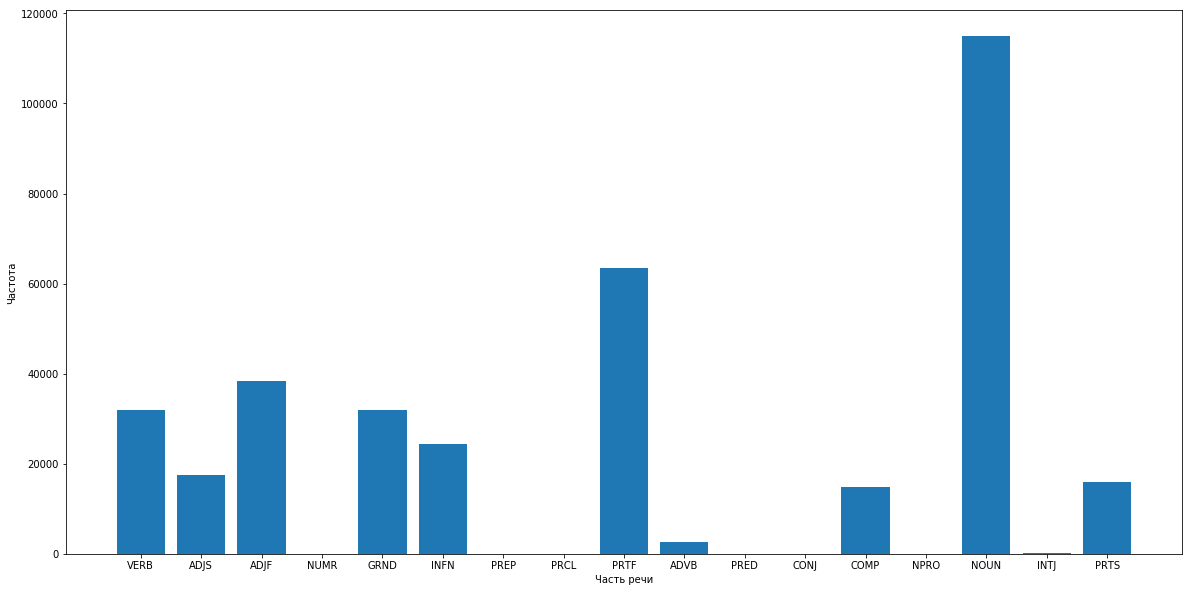

In [28]:
# множество всех частей речи словаря лемм
pos_set = set(dictionary.values())

# инициализация частотного словаря частей речи
pos_freq = dict(list(map(lambda x: (x, 0), pos_set)))

# вычисление частот частей речи лемм, которые не встречаются в коллекции
for word, freq in freq_dict.items():
    if freq == 0:
        pos_freq[dictionary[word]] += 1

plt.figure(figsize = (20, 10))
plt.xlabel("Часть речи")
plt.ylabel("Частота")
_ = plt.bar(pos_freq.keys(), pos_freq.values())

In [34]:
# вывод наиболее частотной части речи, отсутствующей в коллекции
print('Наиболее частотная часть речи, отсутствующая в коллекции:', max(pos_freq.items(), key = lambda x: x[1])[0])

# вывод примеров лемм, отсутствующих в коллекции для каждой части речи
for pos, freq in pos_freq.items():
    print('\nЧасть речи:', pos)
    print('Примеры отсутствующих лемм:', end = ' ')
    print(', '.join(list(map(lambda x: x[0],
        filter(lambda x: x[1] == pos and freq_dict[x[0]] == 0, dictionary.items())))[:10]))

Наиболее частотная часть речи, отсутствующая в коллекции: NOUN

Часть речи: VERB
Примеры отсутствующих лемм: перекувырнул, задариваю, надмачиваю, локализовал, прогневил, откроил, отформовываюсь, подвинтил, предложил, намереваюсь

Часть речи: ADJS
Примеры отсутствующих лемм: нефтесобирающе, вольнопрактикующ, всеподданнейше, хлопчатобумажен, неприсягающе, грудаст, рыборазводяще, сухарен, старопечатен, хулителен

Часть речи: ADJF
Примеры отсутствующих лемм: акмеистский, светлоглазый, паучий, энергоаппаратный, внутрирайонный, некапризный, гвоздзиовский, препроводительный, многоколоночный, трудноватый

Часть речи: NUMR
Примеры отсутствующих лемм: многовато, восьмеро, девятеро, осемьдесят, сколечко, полста, шестьсот, нисколечко, эстолько, семеро

Часть речи: GRND
Примеры отсутствующих лемм: свиристя, призираясь, слопав, двинувшись, восхотев, засигналив, истачивая, зарясь, прижёгши, выведывая

Часть речи: INFN
Примеры отсутствующих лемм: починяться, прикусываться, королевствовать, кровохаркат

In [51]:
# вывод примеров лемм различной длины, отсутствующих в коллекции
for i in range(40):
    print('Примеры отсутствующих лемм длины ' + str(i + 1) + ':', end = ' ')
    print(', '.join(list(map(lambda x: x[0],
        filter(lambda x: x[1] == 0 and len(x[0]) == i + 1, freq_dict.items())))[:10]))

Примеры отсутствующих лемм длины 1: ц, ы
Примеры отсутствующих лемм длины 2: ям, хе, оп, ла, тб, кб, гы, рк, кв, ир
Примеры отсутствующих лемм длины 3: 6-й, цдл, акр, аба, чиф, 2-й, уза, крк, фиг, эре
Примеры отсутствующих лемм длины 4: опор, внии, вжав, фото, яния, адиб, флэш, хота, фуко, меря
Примеры отсутствующих лемм длины 5: гарий, ежова, диэдр, солощ, измит, зимой, илона, зайка, выжал, антуш
Примеры отсутствующих лемм длины 6: гуэмал, модуль, слопав, митины, паучий, даглар, заноза, зарясь, шамада, фаника
Примеры отсутствующих лемм длины 7: дурново, аджиева, грудаст, бычкова, высотка, сухарен, морюшко, откроил, отвезён, ровенка
Примеры отсутствующих лемм длины 8: суперген, свиристя, анабасис, доплюнут, восхотев, запятить, булочнее, гуситски, прижёгши, убыточим
Примеры отсутствующих лемм длины 9: деминские, островина, задариваю, жеребцовы, смешавший, истачивая, палящийся, прогневил, малгожата, акпорисов
Примеры отсутствующих лемм длины 10: пеетеровна, призираясь, починяться, двинув

In [19]:
# сортировка частотного списка лемм
freq_dict = list(sorted(freq_dict.items(), key = lambda x: x[1], reverse = True))

# вывод 50 самых встречаемых лемм в коллекции
for i in range(50):
    print('Слово "', freq_dict[i][0], '" встречается ', freq_dict[i][1], ' раз', sep = '')

Слово "и" встречается 43031 раз
Слово "он" встречается 26219 раз
Слово "не" встречается 21470 раз
Слово "в" встречается 21169 раз
Слово "что" встречается 18532 раз
Слово "я" встречается 17639 раз
Слово "быть" встречается 14918 раз
Слово "на" встречается 12541 раз
Слово "с" встречается 12165 раз
Слово "она" встречается 11765 раз
Слово "как" встречается 9032 раз
Слово "то" встречается 8733 раз
Слово "а" встречается 8016 раз
Слово "это" встречается 7930 раз
Слово "вы" встречается 7226 раз
Слово "но" встречается 7153 раз
Слово "ты" встречается 6111 раз
Слово "к" встречается 5858 раз
Слово "этот" встречается 5711 раз
Слово "же" встречается 5514 раз
Слово "так" встречается 5385 раз
Слово "весь" встречается 5374 раз
Слово "сказать" встречается 5116 раз
Слово "свой" встречается 4827 раз
Слово "они" встречается 4486 раз
Слово "бы" встречается 4239 раз
Слово "который" встречается 4151 раз
Слово "мочь" встречается 4145 раз
Слово "да" встречается 4113 раз
Слово "у" встречается 4080 раз
Слово "за" 